# Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

In [174]:
Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8 FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1
Classes: two classes, namely Fire and not Fire

SyntaxError: invalid syntax (3314076089.py, line 1)

In [175]:
# Target feature-> Temp

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [178]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [180]:
# check for any missing values

df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [181]:
# check missing values row wise

df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [182]:
# .any() return True if value is not zero and vice-versa
# display result w.r to column wise

df.any(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
241    True
242    True
243    True
244    True
245    True
Length: 246, dtype: bool

In [183]:
# display result w.r to row wise

df.any()

day            True
month          True
year           True
Temperature    True
 RH            True
 Ws            True
Rain           True
FFMC           True
DMC            True
DC             True
ISI            True
BUI            True
FWI            True
Classes        True
dtype: bool

# The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset" ->0

2 : "Sidi-Bel Abbes Region Dataset" ->1

Add new column with region

In [184]:
# create new column "Region" and assign values acc.

df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
df1=df

In [185]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [186]:
# Region is in float64 data-type 
df1["Region"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 246 entries, 0 to 245
Series name: Region
Non-Null Count  Dtype  
--------------  -----  
246 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [187]:
#convert Region into int data-type

df[["Region"]] = df[["Region"]].astype(int)
df1["Region"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 246 entries, 0 to 245
Series name: Region
Non-Null Count  Dtype
--------------  -----
246 non-null    int32
dtypes: int32(1)
memory usage: 1.1 KB


In [188]:
# Removing the null values

df1=df1.dropna().reset_index(drop=True)
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [189]:
df1.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [190]:
# remove the 122nd row and reset the index

df1 = df1.drop(122).reset_index(drop=True)
df1.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [191]:
df1.columns
# There is spaces in column names so we will remove them

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [192]:
# strip() method remove all white spaces inside every string value

df1.columns = df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [193]:
# convert required column from object type to int type

df1[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df1[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [194]:
# convert required column from object type to float type except 'classes' column
# 'O' denotes object type

obj = [i for i in df1.columns if df1[i].dtypes=='O']
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [195]:
for i in obj:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)
        
df1.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [196]:
## Let save the cleaned dataset
df1.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

# we haved saved the df1 dataset separately with this name

# Exploratory Data Analysis

In [197]:
## drop day,month and year
df2 = df1.drop(['day','month','year'],axis=1)


In [198]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [199]:
## categories in classes
df2['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [200]:
## Encoding of the categories in classes

df2['Classes']=np.where(df2['Classes'].str.contains('not fire'),0,1)

# this code will check in 'Classes' column if it contains 
# 'not fire' -> 0
# 'fire' -> 1

In [201]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [202]:
df2['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

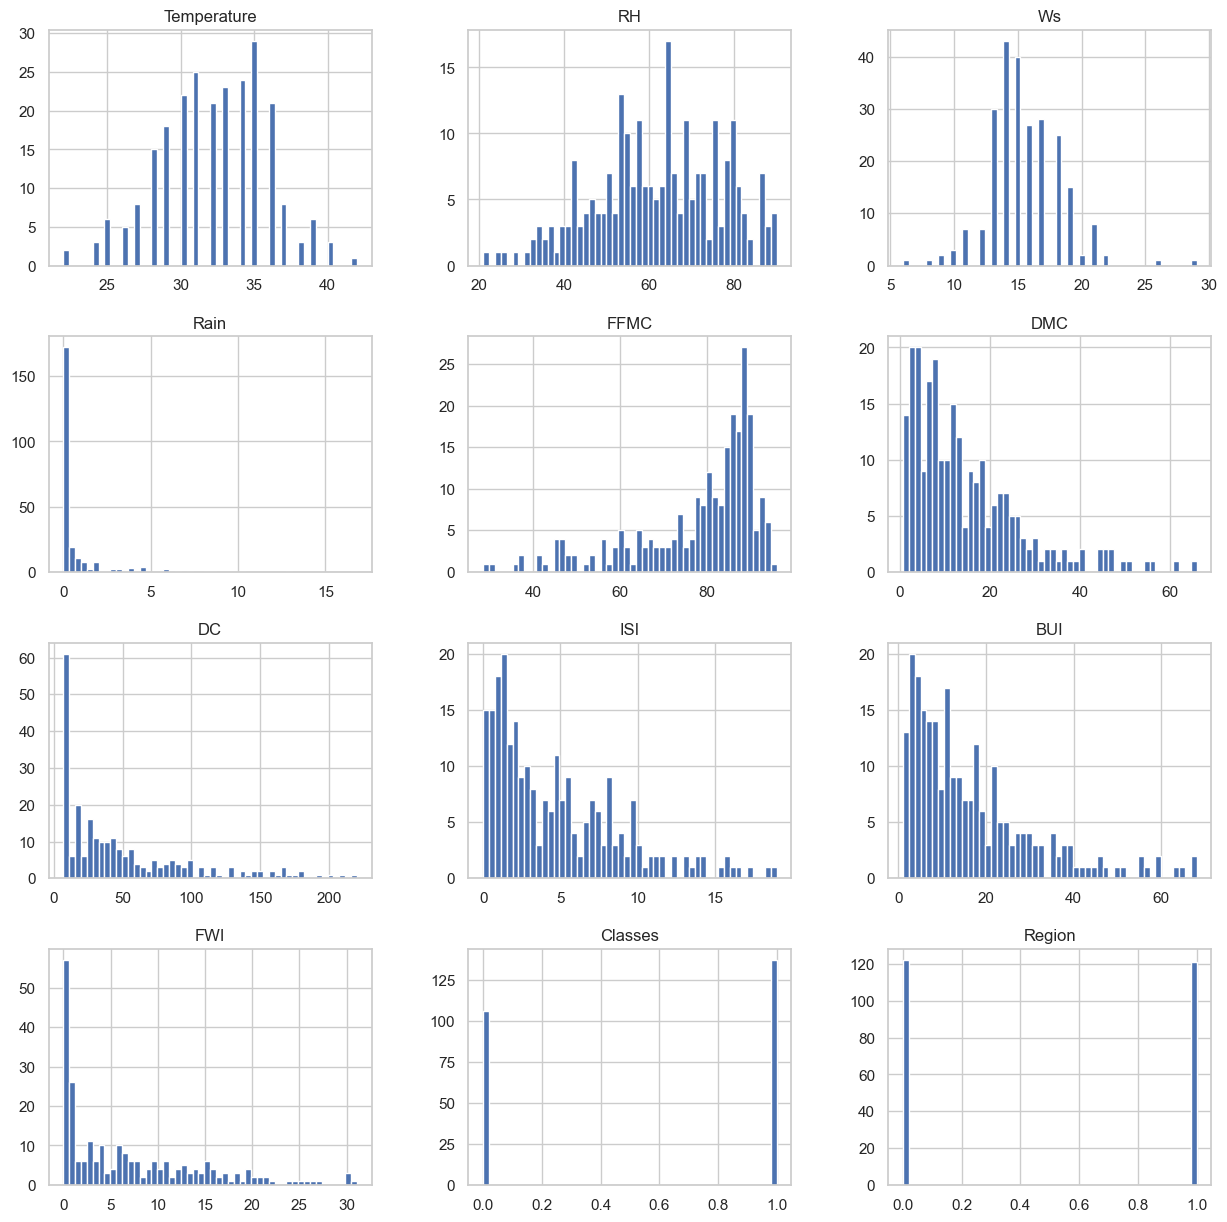

In [203]:
## Plot desnity plot for all features

df2.hist(bins=50,figsize=(15,15))
plt.show()

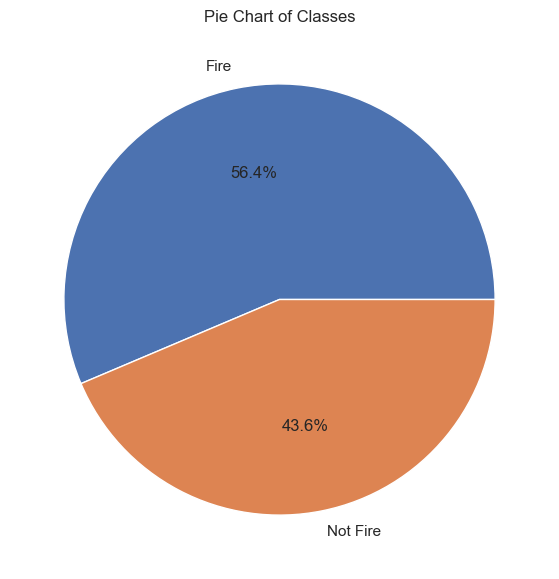

In [204]:
## Percentage for Pie Chart

percentage = df2['Classes'].value_counts(normalize=True)*100

# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

# Correlation

In [205]:
df2.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

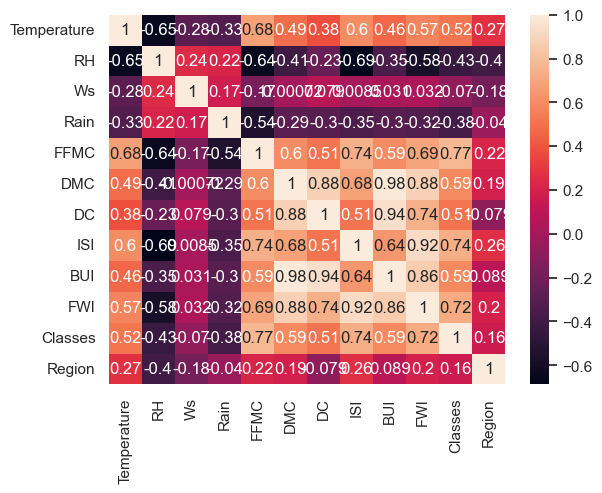

In [206]:
sns.heatmap(df2.corr(),annot=True)

<Axes: ylabel='FWI'>

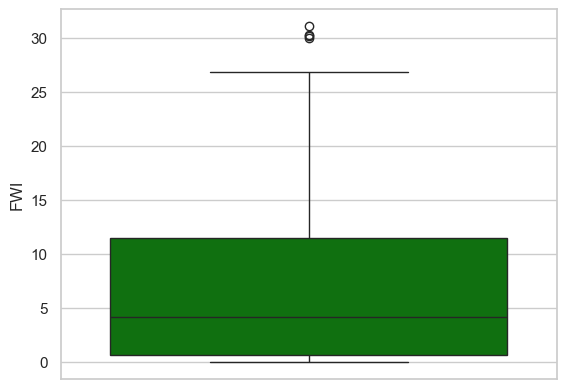

In [207]:
## Box Plots for outliers

sns.boxplot(df2['FWI'],color='green')

In [208]:
# we did not used the num. values in classes column

In [209]:
df1['Classes']=np.where(df1['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

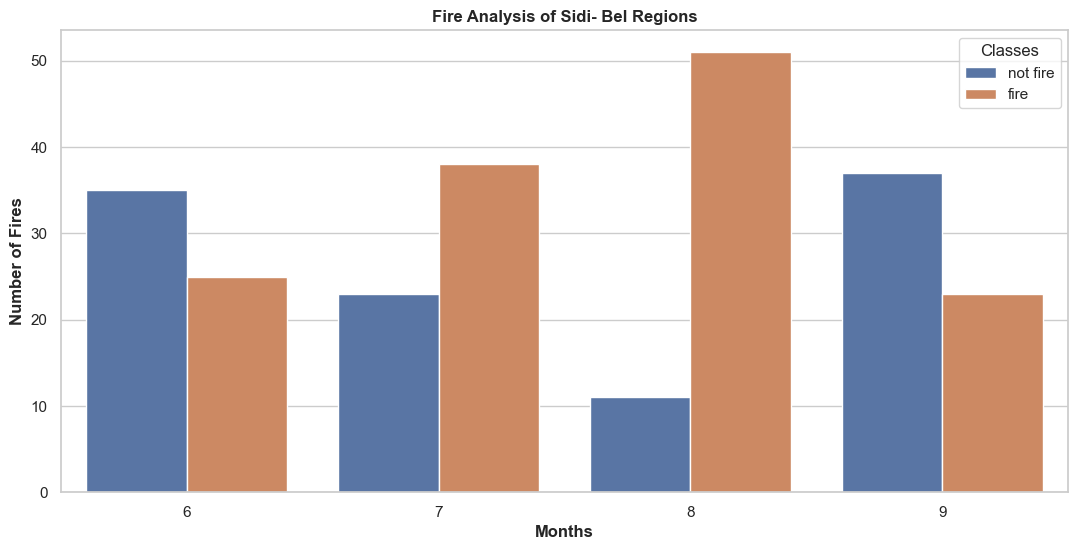

In [210]:
## Monthly Fire Analysis ["region" = 1]

dftemp=df2.loc[df['Region']==1]

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')

sns.countplot(x='month',hue='Classes',data=df1)

plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

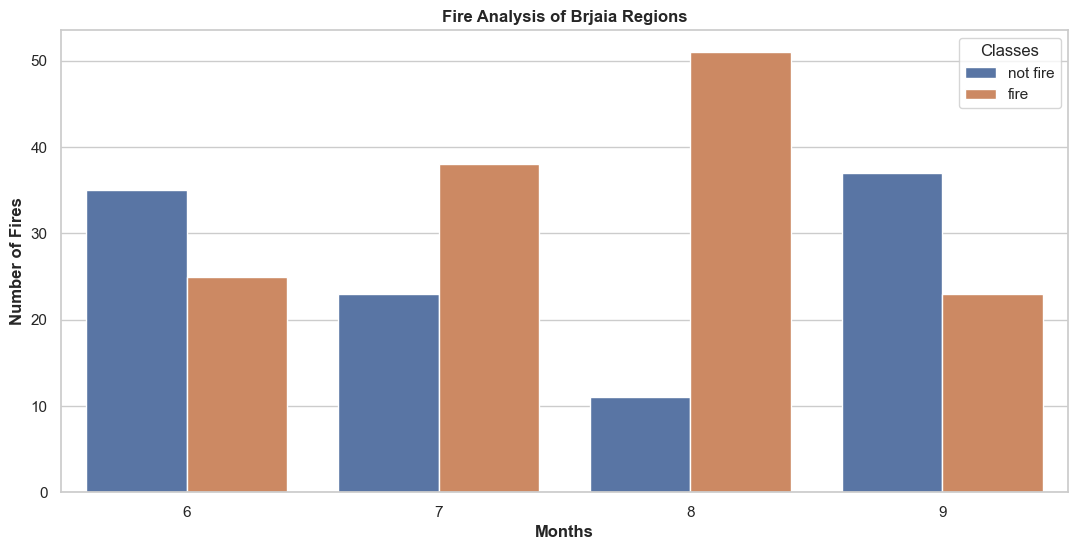

In [211]:
## Monthly Fire Analysis ["region" = 0]

dftemp=df.loc[df['Region']==0]

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')

sns.countplot(x='month',hue='Classes',data=df1)

plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

In [212]:
Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

SyntaxError: invalid syntax (4037681915.py, line 1)

In [213]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# REMOVE OUTLIER 

C:\Users\mirza\AppData\Local\Temp\ipykernel_15056\966290266.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Temperature'])
C:\Users\mirza\AppData\Local\Temp\ipykernel_15056\966290266.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['RH'])
C:\Users\mirza\AppData\Local\Temp\ipykern

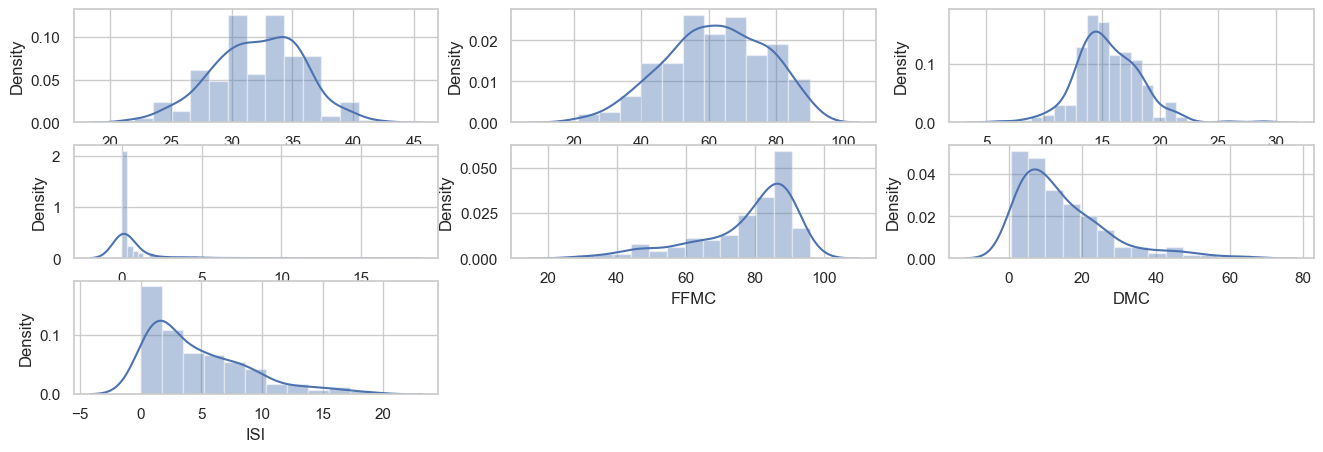

In [214]:
plt.figure(figsize=(16,5))

plt.subplot(3,3,1)
sns.distplot(df2['Temperature'])

plt.subplot(3,3,2)
sns.distplot(df2['RH'])

plt.subplot(3,3,3)
sns.distplot(df2['Ws'])

plt.subplot(3,3,4)
sns.distplot(df2['Rain'])

plt.subplot(3,3,5)
sns.distplot(df2['FFMC'])

plt.subplot(3,3,6)
sns.distplot(df2['DMC'])

plt.subplot(3,3,7)
sns.distplot(df2['ISI'])




plt.show()

In [215]:
df2[[ 'DMC', 'FFMC']].head()

,DMC,FFMC
0,3.4,65.7
1,4.1,64.4
2,2.5,47.1
3,1.3,28.6
4,3.0,64.8


In [216]:
# as values are not near zero then these features are not normally distributed

df2[['DMC', 'FFMC']].skew()

DMC     1.522983
FFMC   -1.320130
dtype: float64

In [217]:
# Finding IQR of these 2 columns:

per25_DMC = df2['DMC'].quantile(0.25)
per75_DMC = df2['DMC'].quantile(0.75)

per25_FFMC = df2['FFMC'].quantile(0.25)
per75_FFMC = df2['FFMC'].quantile(0.75)

iqr_DMC =  per75_DMC - per25_DMC
iqr_FFMC = per75_FFMC - per25_FFMC

upper_limit_DMC = per75_DMC + 1.5 * iqr_DMC
lower_limit_DMC = per75_DMC - 1.5 * iqr_DMC

upper_limit_FFMC = per75_FFMC + 1.5 * iqr_FFMC
lower_limit_FFMC = per75_FFMC - 1.5 * iqr_FFMC

In [218]:
# Trimming [there are many other techniques]

df2 = df2[df2['DMC'] < upper_limit_DMC]
df2 = df2[df2['DMC'] > lower_limit_DMC]
df2.shape

(231, 12)

In [219]:
df2 = df2[df2['FFMC'] > lower_limit_FFMC]
df2 = df2[df2['FFMC'] < upper_limit_FFMC]
df2.shape

(191, 12)

C:\Users\mirza\AppData\Local\Temp\ipykernel_15056\1776678423.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['FFMC'])
C:\Users\mirza\AppData\Local\Temp\ipykernel_15056\1776678423.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['DMC'])


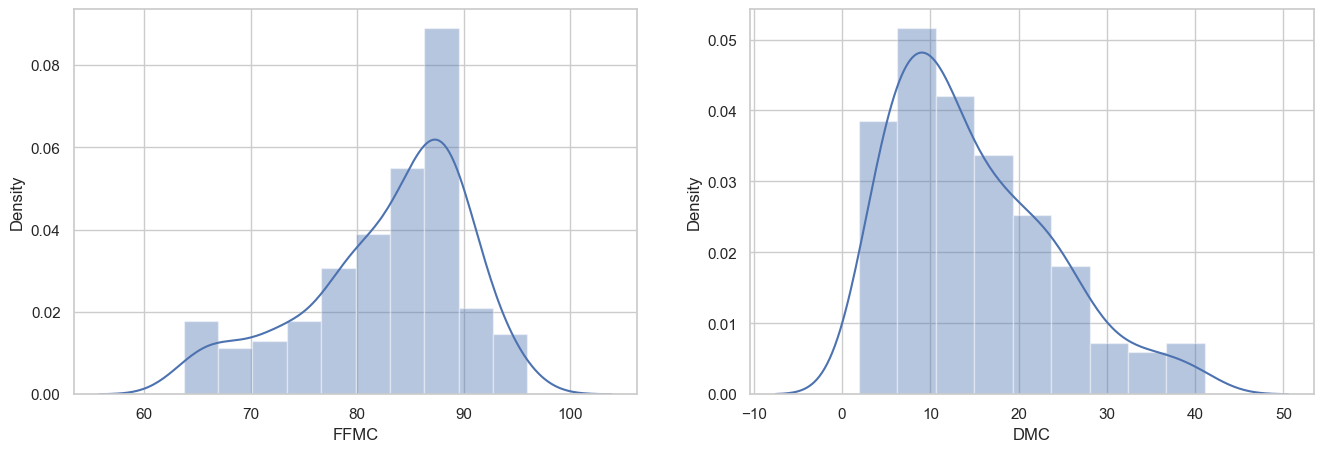

In [220]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df2['FFMC'])

plt.subplot(1,2,2)
sns.distplot(df2['DMC'])

plt.show()

In [221]:
## Independent And dependent features
X = df2.drop('FWI',axis=1)
y = df2['FWI']

In [222]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,1,0


In [223]:
y

0       0.5
1       0.4
4       0.5
5       2.5
6       7.2
       ... 
235    15.2
237     3.0
238     6.5
241     0.7
242     0.5
Name: FWI, Length: 191, dtype: float64

In [224]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [225]:
X_train.shape,X_test.shape

((143, 11), (48, 11))

In [226]:
## Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.590267,-0.280696,0.077619,0.486142,0.431526,0.219220,0.471791,0.375357,0.338609,0.252121
RH,-0.590267,1.000000,0.132931,-0.080755,-0.451493,-0.280440,-0.000268,-0.590998,-0.187141,-0.202024,-0.356645
Ws,-0.280696,0.132931,1.000000,-0.031416,-0.086395,0.014089,0.163280,0.062569,0.075614,-0.023436,-0.093008
Rain,0.077619,-0.080755,-0.031416,1.000000,-0.429933,-0.217662,-0.261489,-0.279680,-0.246450,-0.302838,0.206193
FFMC,0.486142,-0.451493,-0.086395,-0.429933,1.000000,0.594196,0.348201,0.804330,0.552455,0.821620,0.190454
DMC,0.431526,-0.280440,0.014089,-0.217662,0.594196,1.000000,0.778828,0.631540,0.963936,0.476925,0.186992
DC,0.219220,-0.000268,0.163280,-0.261489,0.348201,0.778828,1.000000,0.320364,0.891336,0.329159,-0.182833
ISI,0.471791,-0.590998,0.062569,-0.279680,0.804330,0.631540,0.320364,1.000000,0.565444,0.634489,0.243380
BUI,0.375357,-0.187141,0.075614,-0.246450,0.552455,0.963936,0.891336,0.565444,1.000000,0.473565,0.038052
Classes,0.338609,-0.202024,-0.023436,-0.302838,0.821620,0.476925,0.329159,0.634489,0.473565,1.000000,0.131816


<Axes: >

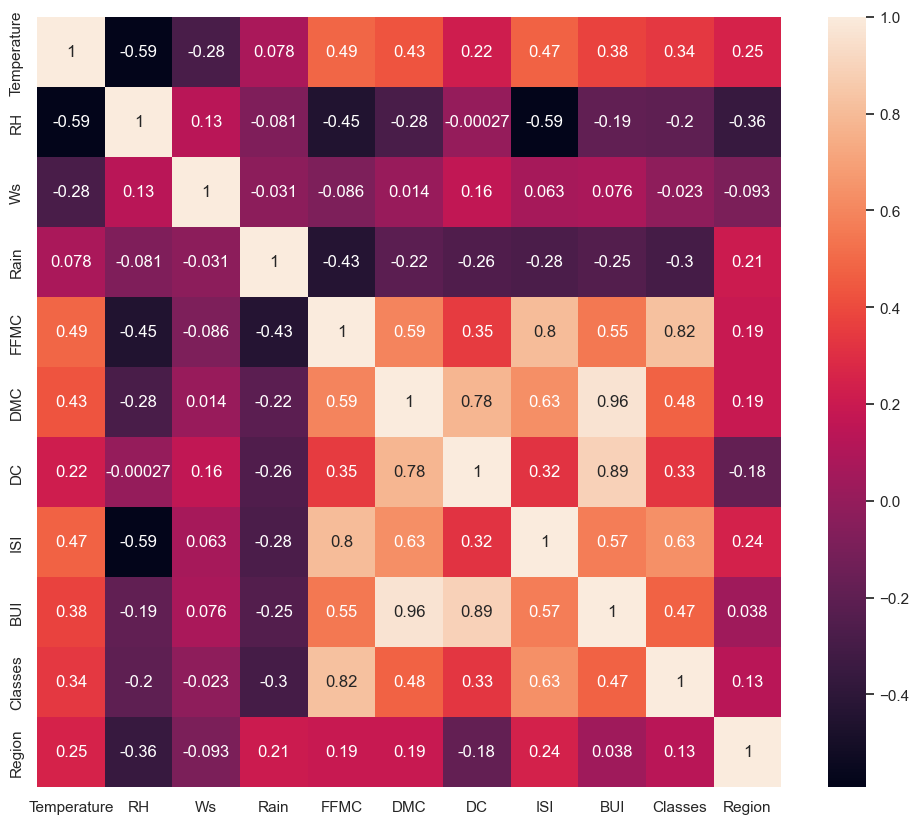

In [227]:
## Check for multicollinearity

plt.figure(figsize=(12,10))

corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [228]:
# so if col1 is highly correlated with col2 and col2 is highly correlated with col3
# Then we can drop col2 
# we are checking in between indep. features with corr = 0.90 or any high value
# This threshold can be decided by domain expert

In [229]:
def correlation(dataset, threshold):
    # stores column names having corr > threshold
    col_corr = set()
    
    #stores the corr table which is infact a matrix
    corr_matrix = dataset.corr()
    
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            
            # abs() convert -ve to +ve
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


# use the function
corr_features=correlation(X_train,0.85)
corr_features

{'BUI'}

In [230]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)

X_test.drop(corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((143, 10), (48, 10))

# Feature Scaling Or Standardization

In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [232]:
X_train_scaled

array([[ 0.67081677, -0.27504567, -0.4895508 , ..., -0.73417209,
        -1.30311673,  0.9258201 ],
       [ 0.3701058 , -0.1260626 , -0.92708682, ..., -0.73417209,
        -1.30311673,  0.9258201 ],
       [-1.43415999,  1.21478502,  2.57320137, ..., -1.09406742,
        -1.30311673, -1.08012345],
       ...,
       [ 0.67081677, -1.16894408,  0.82305728, ...,  0.11415261,
         0.76739096,  0.9258201 ],
       [ 0.06939484, -2.5097917 , -0.92708682, ...,  2.37635183,
         0.76739096,  0.9258201 ],
       [-0.23131613, -0.3495372 , -0.4895508 , ...,  0.01132538,
         0.76739096,  0.9258201 ]])

In [233]:
X_test_scaled

array([[ 6.70816768e-01, -1.91385942e+00,  3.85521252e-01,
        -1.70739091e-01,  8.19285957e-01,  4.02104228e-01,
         3.97921436e-03,  6.53995611e-01,  7.67390962e-01,
         9.25820100e-01],
       [-5.32027092e-01,  8.42327351e-01,  8.23057277e-01,
        -6.98478098e-02, -1.71437031e+00, -1.24112146e+00,
        -4.12382483e-01, -8.88412949e-01, -1.30311673e+00,
        -1.08012345e+00],
       [ 6.70816768e-01,  4.69869679e-01, -5.20147721e-02,
        -2.71630371e-01,  6.05439720e-02,  2.29721122e+00,
         1.43903920e+00, -4.25690381e-01,  7.67390962e-01,
         9.25820100e-01],
       [ 6.70816768e-01,  6.18852748e-01,  1.69812933e+00,
        -3.72521652e-01,  8.19285957e-01,  1.48159555e+00,
         2.37724089e+00,  9.88184132e-01,  7.67390962e-01,
        -1.08012345e+00],
       [ 6.93948380e-02,  4.69869679e-01, -4.89550797e-01,
        -3.72521652e-01,  6.43149425e-01,  9.77832935e-01,
         1.38074856e+00,  1.91273043e-01,  7.67390962e-01,
        -1.

Text(0.5, 1.0, 'X_train After Scaling')

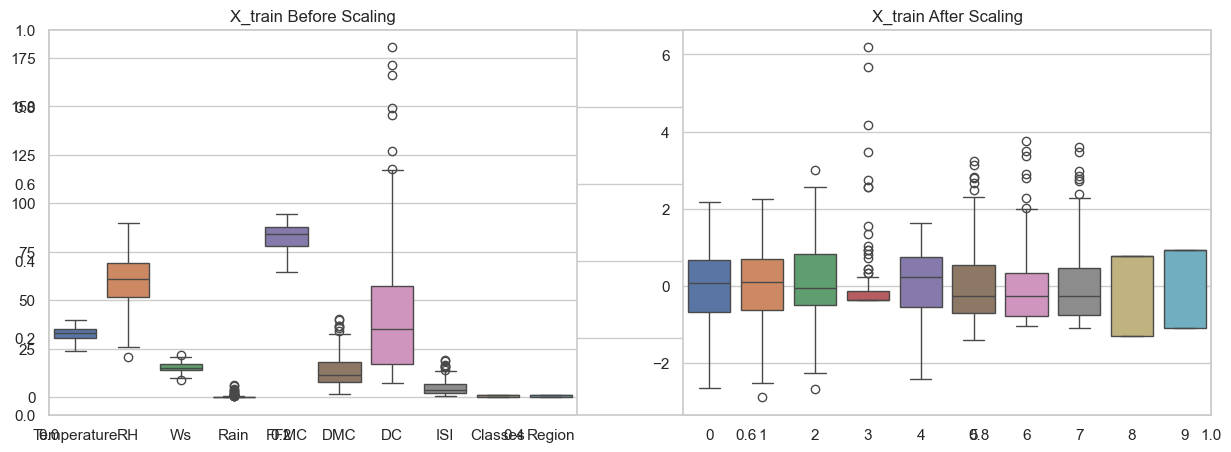

In [234]:
# Box Plots To understand Effect Of Standard Scaler

plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)   # 1-row, 2-col, 1-refer to first plot
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)   # # 1-row, 2-col, 2-refer to first plot
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)

y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error = ", mae)
print("R2 Score = ", score)


Mean absolute error =  1.0105604032318858
R2 Score =  0.9639496785869478


In [236]:
# we got 96% accuracy 

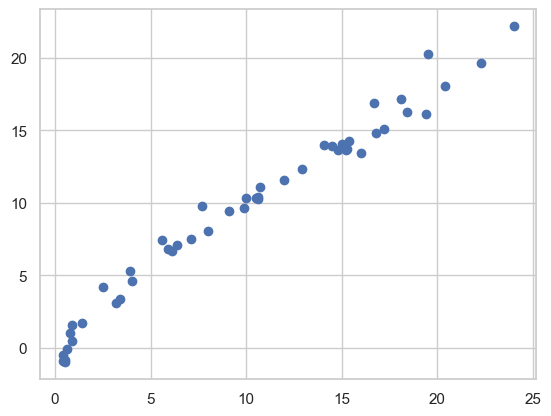

In [237]:
plt.scatter(y_test,y_pred)

# Lasso Regression

In [238]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error = ", mae)
print("R2 Score = ", score)


Mean absolute error =  1.858054344731584
R2 Score =  0.8748879142355817


In [239]:
# we got 87% accuracy with alpha = 1.0(default)
# our accuracy decr. due to L1-reguaralization

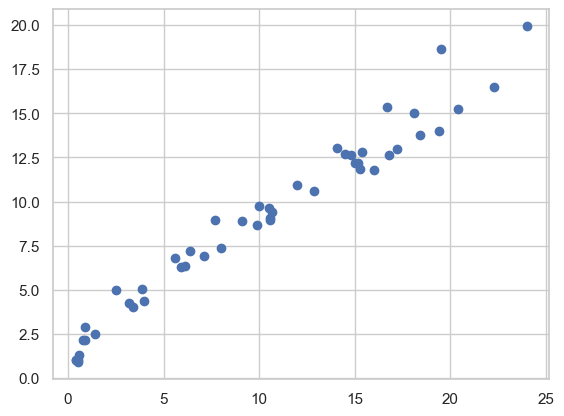

In [240]:
plt.scatter(y_test,y_pred)

In [241]:
# Cross-Validation:

from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [242]:
y_pred = lassocv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print("Mean absolute error = ", mae)
print("R2 Score = ", score)

Mean absolute error =  1.0567833335363919
R2 Score =  0.9593458937880724


In [243]:
# our accuracy has incr. to 95.93% 

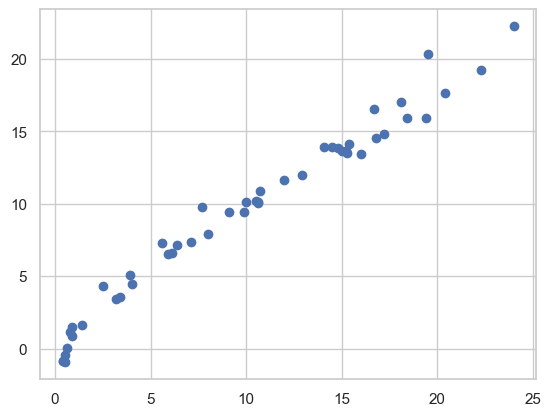

In [244]:
plt.scatter(y_test, y_pred)

# Ridge Regression model

In [245]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error = ", mae)
print("R2 Score = ", score)


Mean absolute error =  1.0217166596653906
R2 Score =  0.9631438764377447


In [246]:
# we got 96% accuracy with alpha = 1.0(default)
# our accuracy decr. due to L2-reguaralization

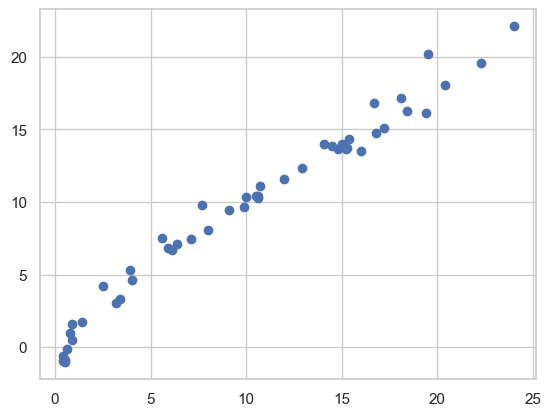

In [247]:
plt.scatter(y_test, y_pred)

In [248]:
# Cross-Validation:

from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

y_pred = ridgecv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error = ", mae)
print("R2 Score = ", score)

Mean absolute error =  1.1411592446787546
R2 Score =  0.9549110908749495


In [249]:
# our accuracy has decr. to 95.4%

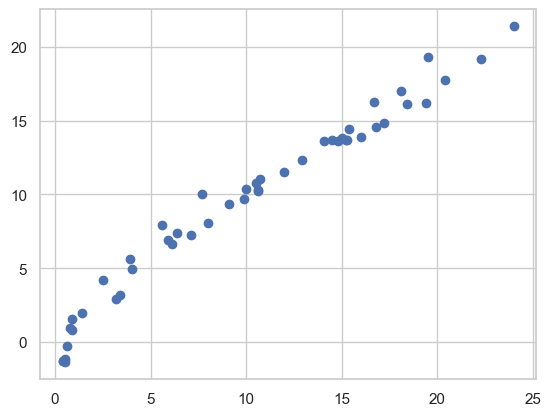

In [250]:
plt.scatter(y_test, y_pred)

# Elasticnet Regression

In [251]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)

y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error = ", mae)
print("R2 Score = ", score)


Mean absolute error =  2.030755901730041
R2 Score =  0.8511037292892631


In [252]:
# we got 85% accuracy

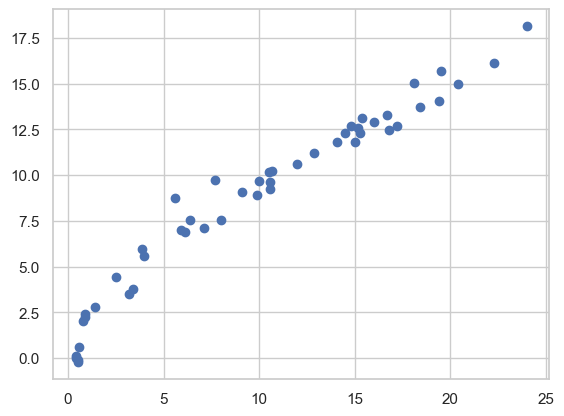

In [253]:
plt.scatter(y_test, y_pred)

In [254]:
# Cross-Validation:

from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)

y_pred = elasticcv.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)

score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.0588837570292853
R2 Score 0.9596561585539469


In [255]:
# our accuracy has incr to 95.96%

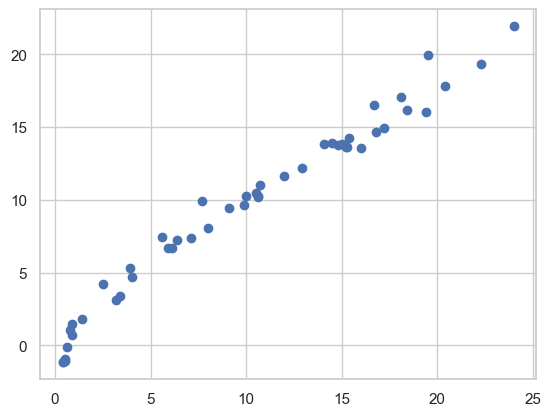

In [256]:
plt.scatter(y_test, y_pred)

# Conclusion and Pickling Models

In [257]:
# the most accuracy is shown by "linear Regression" i.e 96% 
# So, we select that M.L model with the preprocessing model(StandardScaler) and pickle it 

In [262]:
linreg

LinearRegression()

In [259]:
scaler

StandardScaler()

In [263]:
import pickle

pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(linreg, open('linreg.pkl','wb'))